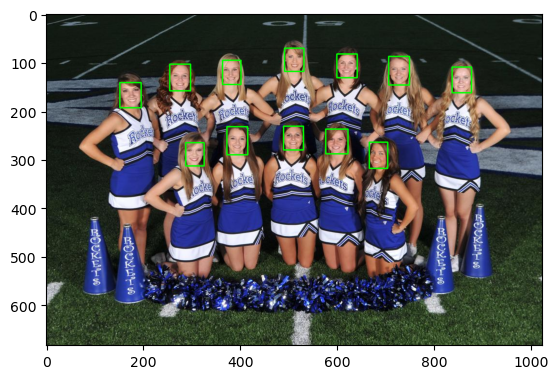

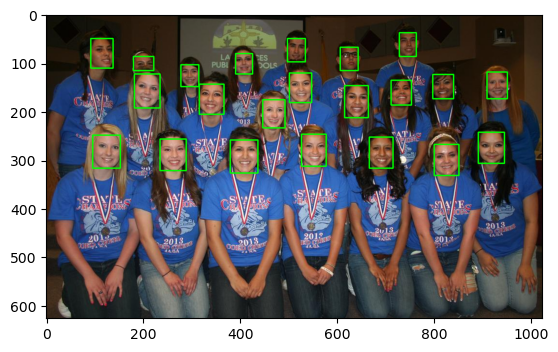

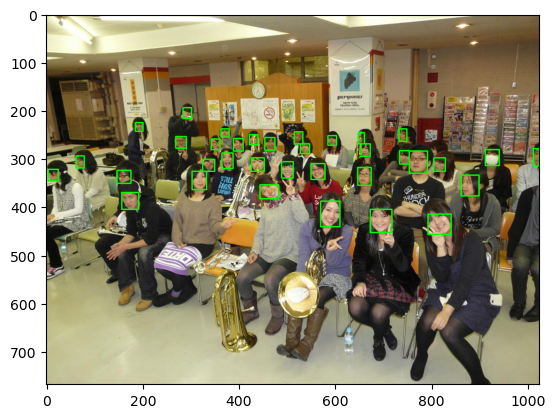

Checking cropped images...
7_Cheering_Cheering_7_74 12


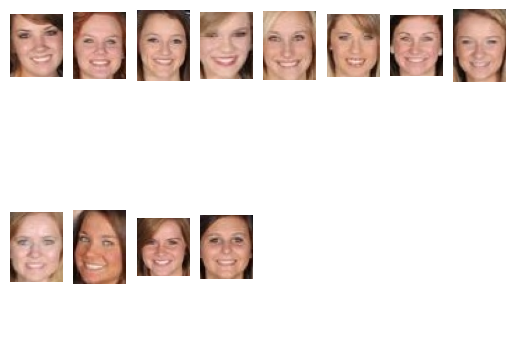

7_Cheering_Cheering_7_543 22


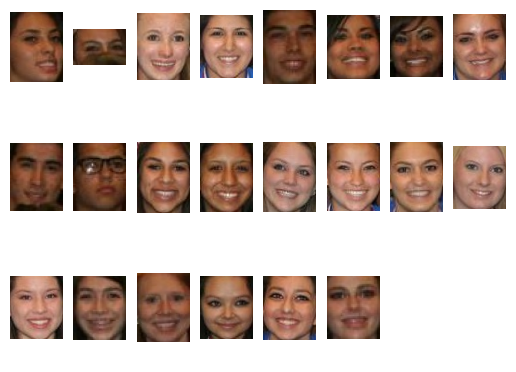

7_Cheering_Cheering_7_889 35


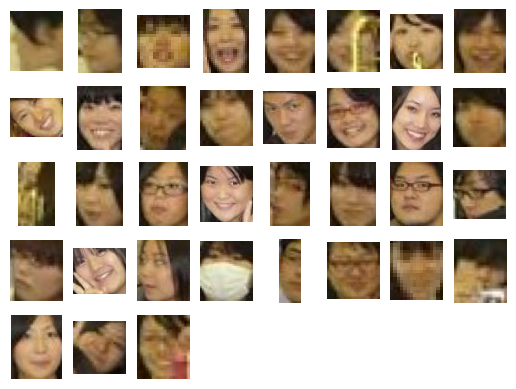

Face Detection using dlib:


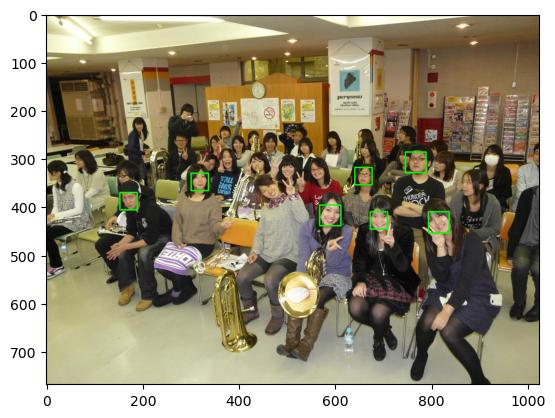

7_Cheering_Cheering_7_889.jpg using dlib detected 7 faces.

After Resizing the input image to height 1400:


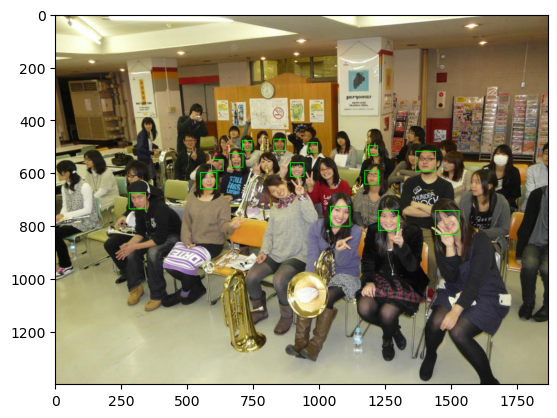

After resizing 7_Cheering_Cheering_7_889.jpg to height 1400, using dlib detected 14 faces.


In [4]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'

def draw_bbox():
  # Enter your code here and remove the following pass (20%)
  for img_name in annotate_dict:
    img_path = os.path.join(data_dir, img_name)
    img_bgr = cv2.imread(img_path)
    
    for bbox in annotate_dict[img_name]:
      x1, y1, x2, y2 = bbox
      cv2.rectangle(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)#img_bgr[:,:,::-1]  
    plt.imshow(img_rgb)
    plt.show()

def save_bbox():
  save_dir = 'save_dir' # Do not change this line
  # Enter your code here (20%)    
  if os.path.exists(save_dir) == False:
    os.mkdir(save_dir)
  for img_name in annotate_dict:
    img_path = os.path.join(data_dir, img_name)
    img = cv2.imread(img_path)
    for i, bbox in enumerate(annotate_dict[img_name]):
      x1, y1, x2, y2 = bbox
      img_crop = img[y1:y2, x1:x2] 
      save_name = img_name[:-4] + '_' + str(i) + '.jpg'
      save_path = os.path.join(save_dir, save_name)
      cv2.imwrite(save_path, img_crop) 

# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def test_dlib():
  # Enter your code here and remove the following pass (30%)
  detector = dlib.get_frontal_face_detector()
  img_name = '7_Cheering_Cheering_7_889.jpg'
  img_path = os.path.join(data_dir, img_name) 
  img = cv2.imread(img_path)
  #print(img.shape)
  dets = detector(img, 1)
  for det in dets:
    x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.show()

  print(f'{img_name} using dlib detected {len(dets)} faces.')

  print('\nAfter Resizing the input image to height 1400:')
  height,width = img.shape[0],img.shape[1]
  img = cv2.imread(img_path)
  img_resize = cv2.resize(img, (int(width*1400/height), 1400))
  #detector = dlib.get_frontal_face_detector()
  dets = detector(img_resize, 1)
  for det in dets:
    x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
    cv2.rectangle(img_resize, (x1, y1), (x2, y2), (0, 255, 0), 2)
  
  img_resize_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
  plt.imshow(img_resize_rgb)
  plt.show()

  print(f'After resizing {img_name} to height 1400, using dlib detected {len(dets)} faces.')

if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  test_dlib()